
## 数据集介绍
N_Days：1986 年注册与死亡、移植或研究分析时间（以较早者为准）之间的天数 drop      分析过程无关(到达最终状态的天数)
状态：患者 C（删失）、CL（因肝脏 tx 而删失）或 D（死亡）的状态           与分析过程无关(最终状态)
药品：药物类型 D-青霉胺或安慰剂
年龄：年龄（天）
性别：M（男）或F（女）
腹水：存在腹水 N（否）或 Y（是）
肝肿大：存在肝肿大 N（否）或 Y（是）
蜘蛛：存在蜘蛛 N（否）或 Y（是）
水肿：存在水肿 N（无水肿且未使用利尿剂治疗水肿）、S（未使用利尿剂即可出现水肿，或利尿剂可缓解水肿）或 Y（利尿剂治疗后仍出现水肿）
胆红素：血清胆红素 [mg/dl]
胆固醇：血清胆固醇 [mg/dl]
白蛋白：白蛋白 [gm/dl]
铜：尿铜 [ug/天]
Alk_Phos：碱性磷酸酶，单位：[U/升]
SGOT：SGOT 单位 [U/ml]
Tryglicerides：三格列苷类 [mg/dl]
血小板：每立方血小板 [ml/1000]
凝血酶原：凝血酶原时间（秒）
分期：疾病的组织学分期（1、2或3）



### 数据解释

在肝硬化或其他医学研究的数据集中，患者状态标记为C（删失）、CL（因肝脏移植而删失）或D（死亡）通常指的是对患者随访结局的分类，具体解释如下：

C（删失）：这意味着在研究期间，该患者的数据收集因某些原因中断，最常见的删失原因是患者失访、退出研究或研究结束时患者仍存活但没有达到研究的一个明确终点，如未发展到某个疾病阶段或未经历特定事件。删失数据在统计分析中需要特别处理，因为它可能导致结果偏差。

CL（因肝脏移植而删失）：这里的“删失”并不是指数据丢失，而是指患者因为接受了肝脏移植手术而退出了原本的观察队列。肝脏移植可以视为一种治疗成功，使得患者不再符合继续追踪原有研究终点（如疾病进展或死亡）的条件。因此，这类患者的结果不计入疾病自然史的死亡或恶化统计中，但在评估治疗效果或生存率时，移植本身可能被视为一个积极的事件。

D（死亡）：这个标记简单明了，表示患者在研究期间死亡。在肝硬化的背景下，这通常指的是患者因疾病进展或其他并发症导致的死亡。

# 数据列
N_Days：天数
Status：患者状态     患者 C（删失）、CL（因肝脏 tx 而删失）或 D（死亡）的状态

Drug：药物类型 药物类型 D-青霉胺或安慰剂
Age：年龄      年龄（天）
Sex：性别       M（男）或F（女）
Ascites：腹水  存在腹水 N（否）或 Y（是）
Hepatomegaly：肝脏肿大  存在肝肿大 N（否）或 Y（是）
Spiders：蜘蛛痣 存在蜘蛛 N（否）或 Y（是）
Edema：水肿       存在水肿 N（无水肿且未使用利尿剂治疗水肿）、S（未使用利尿剂即可出现水肿，或利尿剂可缓解水肿）或 Y（利尿剂治疗后仍出现水肿）

Bilirubin：胆红素  血清胆红素 [mg/dl]
Cholesterol：胆固醇 血清胆固醇 [mg/dl]
Albumin：白蛋白 白蛋白 [gm/dl]
Copper：铜 尿铜 [ug/天]
Alk_Phos：碱性磷酸酶  碱性磷酸酶，单位：[U/升]
SGOT：血清谷草转氨酶 SGOT 单位 [U/ml]
Tryglicerides：甘油三酯 三格列苷类 [mg/dl]
Platelets：血小板 每立方血小板 [ml/1000]
Prothrombin：凝血酶原时间 凝血酶原时间（秒)


# 版本
pandas                    2.0.3
numpy                     1.24.4
scikit-learn              1.3.0
seaborn                   0.12.2

In [8]:
#导入所需包
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

plt.rcParams['font.sans-serif'] = ['SimHei']  # 例如使用SimHei字体，确保该字体已安装且matplotlib可以访问
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [9]:
# data = pd.read_csv('../data/StudentsPerformance.csv',names=['性别','民族','父母教育程度','午餐标准','备考课程','数学成绩','阅读分数','写作分数'])
'''
转换列名为中文引起数据类型变化
'''
# data = pd.read_csv('data/liver_cirrhosis.csv',names = ['天数', '患者状态', '药物类型', '年龄', '性别', '腹水', '肝脏肿大', '蜘蛛痣', '水肿','胆红素', '胆固醇', '白蛋白', '铜', '碱性磷酸酶', '血清谷草转氨酶', '甘油三酯', '血小板','凝血酶原时间', '疾病阶段'])

data = pd.read_csv('data/liver_cirrhosis.csv').drop(columns=['N_Days','Status'])

data.sample(20)

Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
8549           Placebo  15706   F       Y            N       Y     N   
7477   D-penicillamine  14939   F       N            N       N     N   
7632   D-penicillamine  14106   F       N            N       N     S   
16202          Placebo  20548   F       N            N       N     N   
13122          Placebo  16839   F       N            Y       N     N   
7827           Placebo  12641   F       N            Y       Y     S   
21507          Placebo  18352   M       N            Y       N     N   
15297  D-penicillamine  21828   F       N            Y       N     N   
16451  D-penicillamine  17664   F       N            N       N     N   
15358  D-penicillamine  19015   F       N            N       N     N   
15515          Placebo  17841   F       N            Y       N     N   
15575          Placebo  17874   F       N            Y       N     S   
13240          Placebo  14610   F       Y            N       Y     N   
23691          Placebo  16898   F       N            Y       N     N   
4164           Placebo  16941   F       N            Y       N     N   
3647           Placebo  17323   F       N            Y       Y     S   
323    D-penicillamine  12979   F       N            N       N     N   
17987  D-penicillamine  21828   F       N            N       N     N   
13551          Placebo  24257   F       N            N       N     S   
12761          Placebo  12779   F       N            N       Y     N   

       Bilirubin  Cholesterol  Albumin      Copper     Alk_Phos        SGOT  \
8549         1.6   325.000000     3.69   69.000000  2583.000000  142.000000   
7477        10.8   932.000000     3.19  267.000000  2184.000000  161.200000   
7632         3.0   458.000000     3.63   74.000000  1588.000000  106.950000   
16202        4.7   478.000000     4.38   44.000000  1629.000000  237.150000   
13122        1.3   316.000000     3.51   75.000000  1162.000000  147.250000   
7827         1.3   250.000000     3.50   48.000000  1138.000000   71.300000   
21507        8.6   546.000000     3.73   84.000000  1070.000000  127.000000   
15297        4.5   372.000000     3.38  227.000000  2310.000000  167.400000   
16451        0.6   217.000000     3.62   13.000000   414.000000   75.950000   
15358        0.8   315.000000     3.70   37.000000  1637.000000  170.500000   
15515        1.2   502.000000     3.57   79.000000   964.000000  120.900000   
15575        8.7   310.000000     3.89  107.000000   637.000000  117.000000   
13240        0.7   369.510563     3.06   97.648387  1982.655769  122.556346   
23691        4.5   372.000000     3.38  227.000000  2310.000000  167.400000   
4164         8.0   468.000000     2.81  139.000000  2009.000000  198.400000   
3647         1.1   432.000000     3.57   45.000000  1406.000000  190.000000   
323          1.1   369.510563     3.69   97.648387  1982.655769  122.556346   
17987        0.5   280.000000     4.23   36.000000   377.000000   56.000000   
13551        0.6   369.510563     3.35   97.648387  1982.655769  122.556346   
12761        0.5   316.000000     3.65   68.000000  1716.000000  187.550000   

       Tryglicerides  Platelets  Prothrombin  Stage  
8549      140.000000      224.0         10.0      2  
7477      157.000000      304.0          9.9      3  
7632      382.000000      309.0          9.9      2  
16202      76.000000      175.0         10.4      2  
13122     137.000000      277.0         11.0      3  
7827      100.000000       95.0         11.6      3  
21507     153.000000      291.0         11.2      2  
15297     135.000000      181.0         10.2      2  
16451     119.000000      192.0         10.5      2  
15358      70.000000      273.0         10.5      1  
15515     180.000000      410.0         11.5      3  
15575     242.000000      298.0         10.0      1  
13240     124.702128      117.0         10.9      3  
23691     135.000000      240.0         12.4      2  
4164      139.000000      296.0    

In [10]:
data.columns

Index(['Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
       'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

In [11]:
data.describe()

Age     Bilirubin   Cholesterol       Albumin        Copper  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean   18495.877080      3.402644    372.331471      3.486578    100.184663   
std     3737.596616      4.707491    193.668452      0.380488     73.184840   
min     9598.000000      0.300000    120.000000      1.960000      4.000000   
25%    15694.000000      0.800000    275.000000      3.290000     52.000000   
50%    18499.000000      1.300000    369.510563      3.510000     97.648387   
75%    20955.000000      3.400000    369.510563      3.750000    107.000000   
max    28650.000000     28.000000   1775.000000      4.640000    588.000000   

           Alk_Phos          SGOT  Tryglicerides     Platelets   Prothrombin  \
count  25000.000000  25000.000000   25000.000000  25000.000000  25000.000000   
mean    1995.675597    123.166345     123.822548    256.007337     10.734549   
std     1798.885660     47.747616      52.786350     98.679006      0.904436   
min      289.000000     26.350000      33.000000     62.000000      9.000000   
25%     1032.000000     92.000000      92.000000    189.000000     10.000000   
50%     1828.000000    122.556346     124.702128    251.000000     10.600000   
75%     1982.655769    134.850000     127.000000    311.000000     11.100000   
max    13862.400000    457.250000     598.000000    721.000000     18.000000   

             Stage  
count  25000.00000  
mean       2.00116  
std        0.81387  
min        1.00000  
25%        1.00000  
50%        2.00000  
75%        3.00000  
max        3.00000

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           25000 non-null  object 
 1   Age            25000 non-null  int64  
 2   Sex            25000 non-null  object 
 3   Ascites        25000 non-null  object 
 4   Hepatomegaly   25000 non-null  object 
 5   Spiders        25000 non-null  object 
 6   Edema          25000 non-null  object 
 7   Bilirubin      25000 non-null  float64
 8   Cholesterol    25000 non-null  float64
 9   Albumin        25000 non-null  float64
 10  Copper         25000 non-null  float64
 11  Alk_Phos       25000 non-null  float64
 12  SGOT           25000 non-null  float64
 13  Tryglicerides  25000 non-null  float64
 14  Platelets      25000 non-null  float64
 15  Prothrombin    25000 non-null  float64
 16  Stage          25000 non-null  int64  
dtypes: float64(9), int64(2), object(6)
memory usage: 3

In [13]:
#数据类型转换
#年龄转化 days 岁
data[["Age"]] =(data[["Age"]].astype(int)/365).astype(int) 

In [14]:
# 检查年龄是否转换成功
data.sample(20)

Drug  Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
800            Placebo   49   M       N            Y       N     S        1.2   
4201           Placebo   51   F       Y            Y       Y     N       14.1   
12735  D-penicillamine   62   F       Y            Y       N     S        1.1   
2182   D-penicillamine   36   F       N            N       N     N        3.4   
19734          Placebo   46   F       Y            N       Y     N        0.8   
17959          Placebo   30   F       Y            N       Y     N        1.4   
18468          Placebo   56   F       Y            Y       Y     Y       13.8   
13893  D-penicillamine   62   F       Y            Y       N     Y        0.8   
14593  D-penicillamine   52   F       N            N       N     N        0.8   
6979           Placebo   56   F       N            N       N     N        0.5   
10213  D-penicillamine   36   F       N            N       N     N        3.4   
7719   D-penicillamine   36   F       N            N       N     N        3.4   
3463           Placebo   69   F       Y            Y       Y     N        7.3   
20269  D-penicillamine   53   F       N            N       N     N        0.3   
23688          Placebo   51   M       N            Y       N     N        2.3   
1556           Placebo   51   F       N            N       N     N        1.8   
24692          Placebo   32   F       N            N       N     N        5.6   
105    D-penicillamine   40   F       N            N       N     N        0.9   
13340          Placebo   54   F       Y            N       Y     N        1.3   
15902  D-penicillamine   48   F       N            Y       Y     N        6.3   

       Cholesterol  Albumin      Copper      Alk_Phos        SGOT  \
800     369.510563     3.89   58.000000   1284.000000  173.600000   
4201    448.000000     2.43  123.000000   1833.000000  134.000000   
12735   432.000000     3.57   45.000000   1406.000000  190.000000   
2182    356.000000     3.37  188.000000   1911.000000   92.000000   
19734   369.510563     2.89   97.648387   1982.655769  122.556346   
17959   369.510563     3.98   97.648387   1982.655769  122.556346   
18468   369.510563     2.94   97.648387   1982.655769  122.556346   
13893   369.510563     2.27   43.000000    728.000000   71.000000   
14593   360.000000     3.70   37.000000   1840.000000  170.500000   
6979    316.000000     3.65   68.000000   1716.000000  187.550000   
10213   356.000000     3.37  188.000000   1911.000000   92.000000   
7719    356.000000     3.37  188.000000   1911.000000   92.000000   
3463    426.000000     3.93  262.000000   2424.000000  145.700000   
20269   233.000000     4.08   20.000000    622.000000   66.650000   
23688   178.000000     3.00  145.000000    746.000000  178.250000   
1556    416.000000     3.94  121.000000  10165.000000   79.980000   
24692   338.000000     3.70  130.000000   2139.000000  185.000000   
105     369.510563     3.83   97.648387   1982.655769  122.556346   
13340   205.000000     3.34   65.000000   1031.000000   91.450000   
15902   436.000000     3.02   75.000000   2176.000000  170.500000   

       Tryglicerides  Platelets  Prothrombin  Stage  
800       124.702128  298.00000    10.000000      1  
4201      155.000000  257.02457     9.300000      3  
12735      77.000000  139.00000    11.400000      3  
2182      130.000000  313.00000    11.200000      1  
19734     124.702128  419.00000    10.731731      1  
17959     124.702128  402.00000    11.000000      1  
18468     124.702128  214.00000    11.700000      3  
13893     124.702128  139.00000    11.000000      3  
14593      64.000000  273.00000    10.500000      1  
6979       71.000000  356.00000     9.800000      2  
10213     130.000000  313.00000    11.200000      1  
7719      130.000000  313.00000    11.200000      1  
3463      218.000000  173.00000    10.900000      2  
20269      68.000000  358.00000     9.900000      2  
23688     122.000000  112.00000    12.000000      3  
15

In [15]:
data.describe()

Age     Bilirubin   Cholesterol       Albumin        Copper  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean      50.294360      3.402644    372.331471      3.486578    100.184663   
std       10.282472      4.707491    193.668452      0.380488     73.184840   
min       26.000000      0.300000    120.000000      1.960000      4.000000   
25%       42.000000      0.800000    275.000000      3.290000     52.000000   
50%       50.000000      1.300000    369.510563      3.510000     97.648387   
75%       57.000000      3.400000    369.510563      3.750000    107.000000   
max       78.000000     28.000000   1775.000000      4.640000    588.000000   

           Alk_Phos          SGOT  Tryglicerides     Platelets   Prothrombin  \
count  25000.000000  25000.000000   25000.000000  25000.000000  25000.000000   
mean    1995.675597    123.166345     123.822548    256.007337     10.734549   
std     1798.885660     47.747616      52.786350     98.679006      0.904436   
min      289.000000     26.350000      33.000000     62.000000      9.000000   
25%     1032.000000     92.000000      92.000000    189.000000     10.000000   
50%     1828.000000    122.556346     124.702128    251.000000     10.600000   
75%     1982.655769    134.850000     127.000000    311.000000     11.100000   
max    13862.400000    457.250000     598.000000    721.000000     18.000000   

             Stage  
count  25000.00000  
mean       2.00116  
std        0.81387  
min        1.00000  
25%        1.00000  
50%        2.00000  
75%        3.00000  
max        3.00000

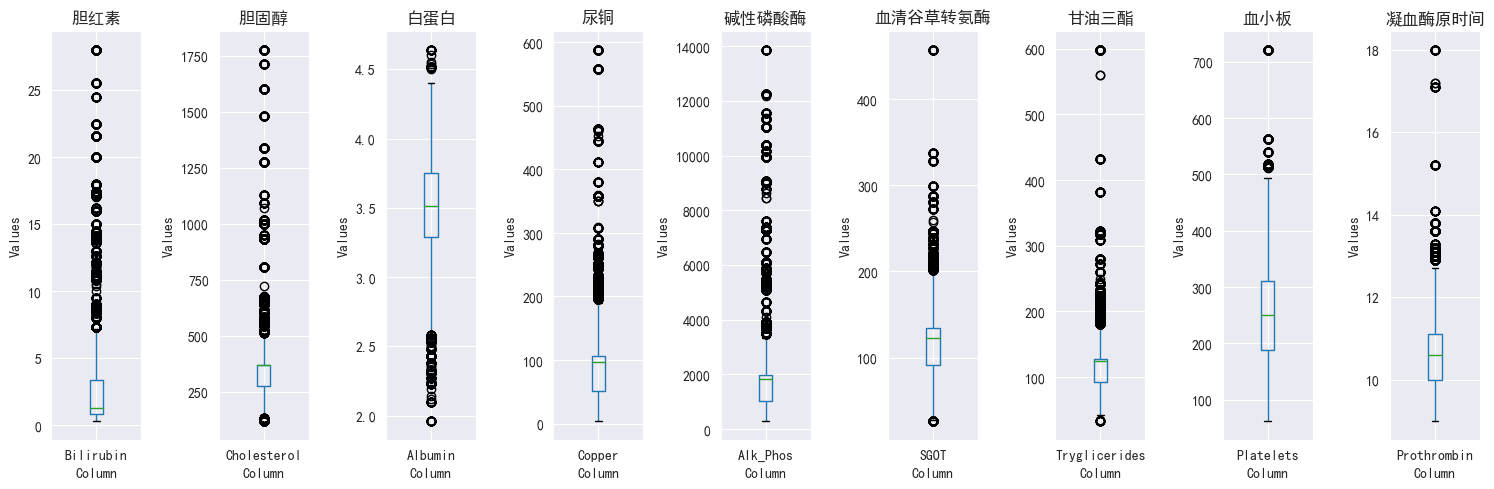

In [16]:
#部分数据列的箱线图

# 指定需要绘制箱线图的列
columns_to_plot = ['Bilirubin', 'Cholesterol', 'Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
names =['胆红素','胆固醇','白蛋白' ,'尿铜', '碱性磷酸酶' ,'血清谷草转氨酶' ,'甘油三酯' ,'血小板' ,'凝血酶原时间']
# 创建子图
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# 绘制每个列的箱线图
for ax, column,name in zip(axes, columns_to_plot,names):
    data.boxplot(column=column, ax=ax)
    ax.set_title(f'{name}')
    ax.set_xlabel('Column')
    ax.set_ylabel('Values')

# 调整子图布局
plt.tight_layout()
plt.show()

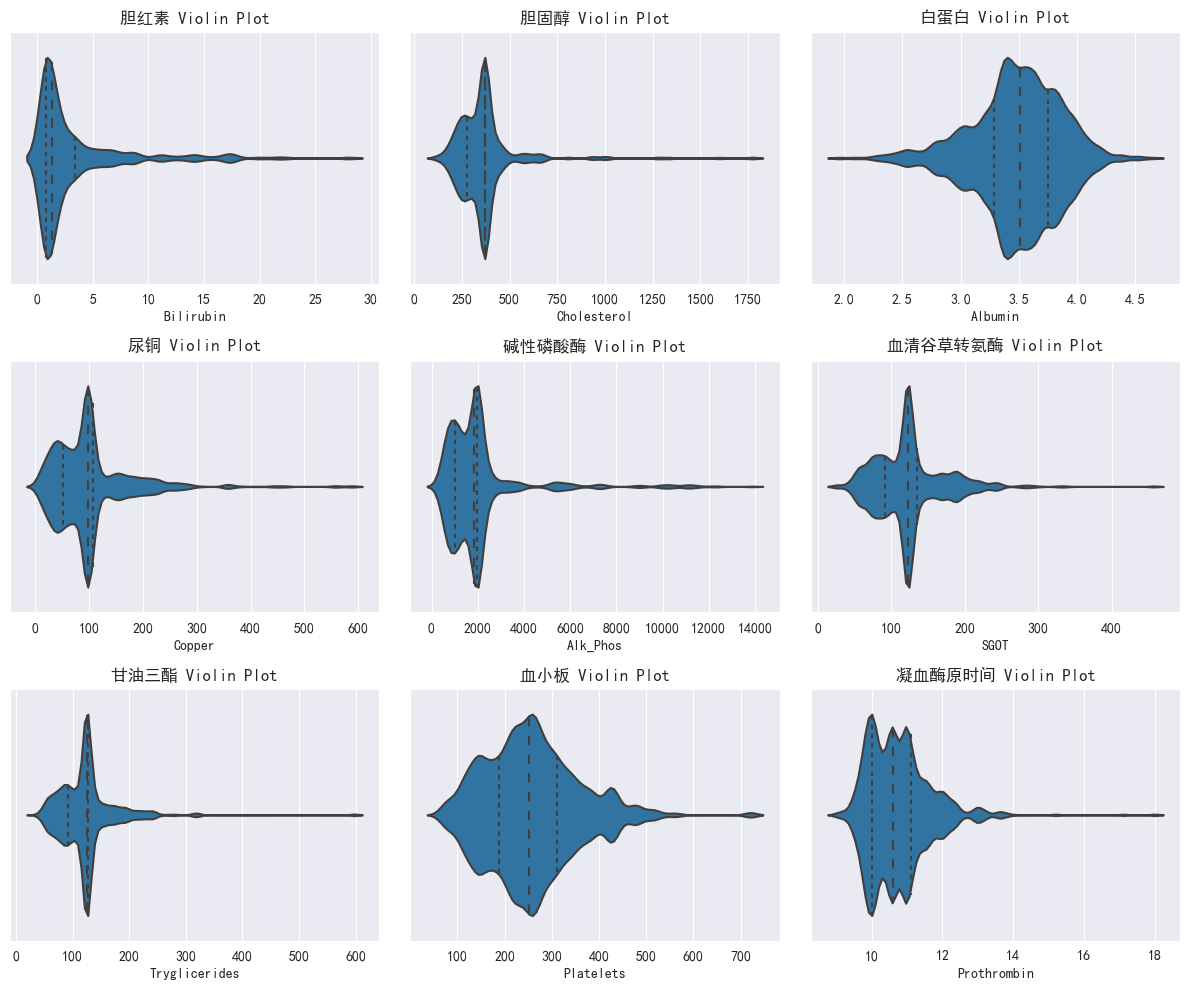

In [17]:

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
columns_to_plot = ['Bilirubin', 'Cholesterol', 'Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
names =['胆红素','胆固醇','白蛋白' ,'尿铜', '碱性磷酸酶' ,'血清谷草转氨酶', '甘油三酯' ,'血小板' ,'凝血酶原时间']
for i, col in enumerate(columns_to_plot):
    row = i // 3
    col_idx = i % 3
    # 在对应子图上绘制小提琴图
    sns.violinplot(x=col, data=data, ax=axes[row, col_idx], inner="quartile")
    # 设置子图标题
    axes[row, col_idx].set_title(names[i]+' Violin Plot')
# 调整子图间距
plt.tight_layout()

# 显示图形
plt.show()

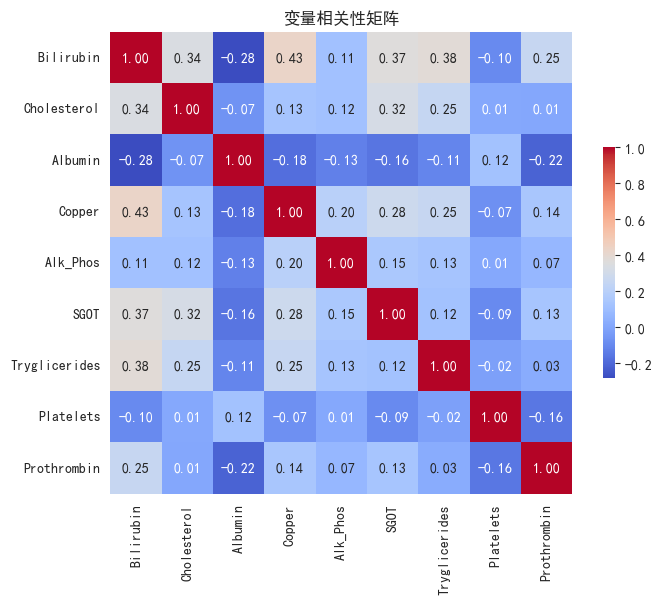

In [18]:
# 热力图

columns_to_plot = ['Bilirubin', 'Cholesterol', 'Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
df_heat = data[columns_to_plot]
# 计算相关系数矩阵
corr = df_heat.corr()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('变量相关性矩阵')
plt.show()

<Figure size 1000x600 with 0 Axes>

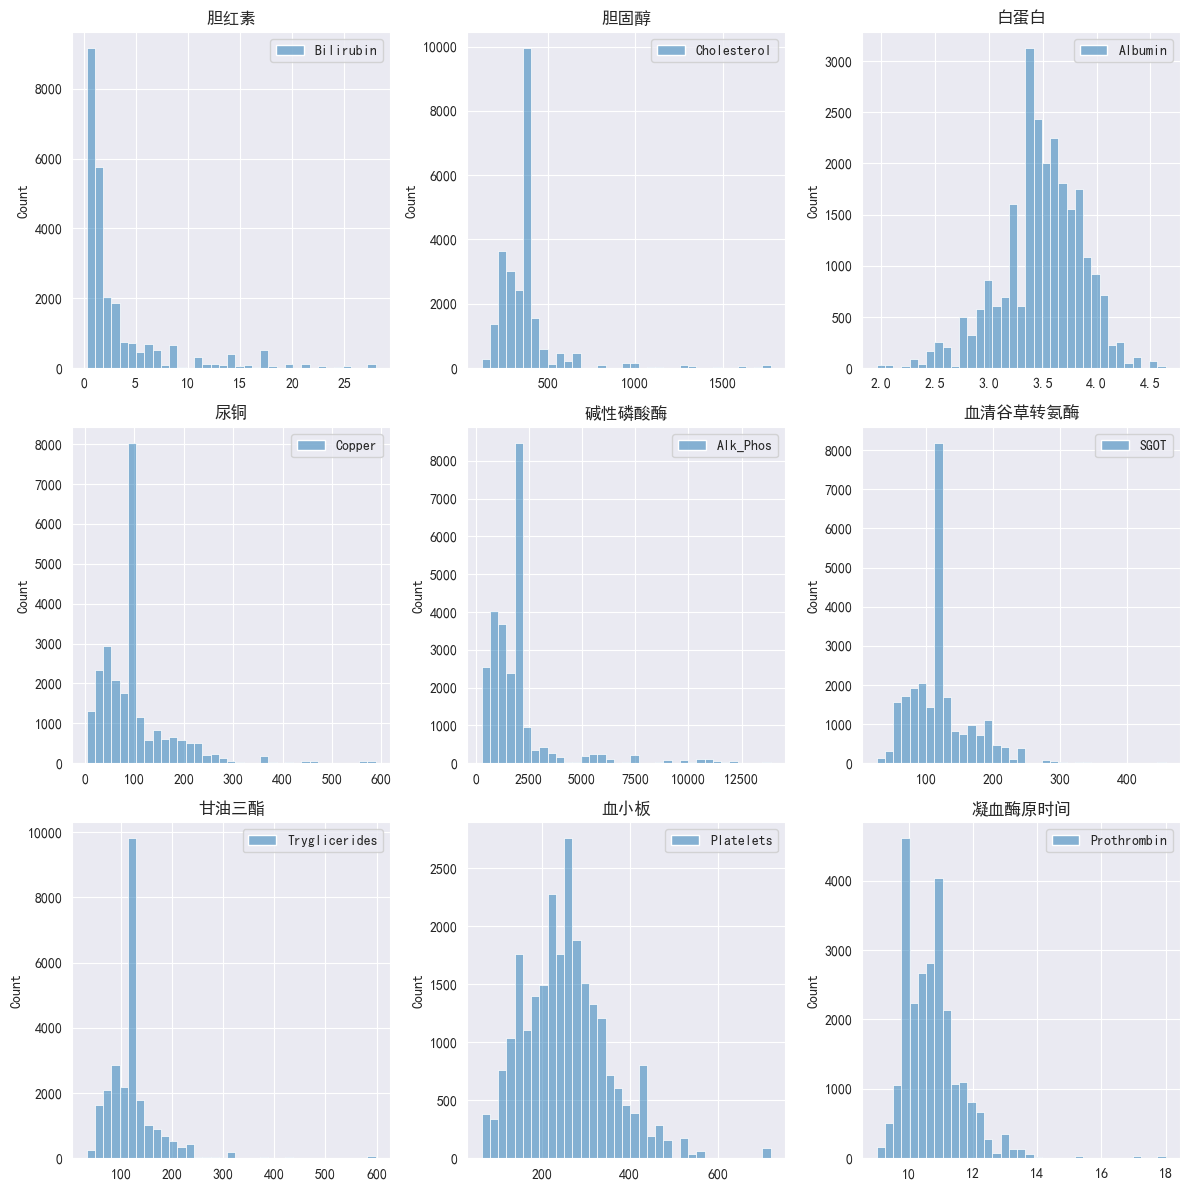

In [19]:

columns_to_plot = ['Bilirubin', 'Cholesterol', 'Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']

plt.figure(figsize=(10, 6))
# 创建一个图形和子图

# 创建一个大的图形和子图
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 4*3))

# 遍历要绘制的列
for i, col in enumerate(columns_to_plot):
    row_idx = i // 3
    col_idx = i % 3
    sns.histplot(data=data[[col]], bins=35, ax=axes[row_idx, col_idx])  # 绘制直方图
    axes[row_idx, col_idx].set_title(names[i])  # 设置子图标题

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

C:\Users\li\.conda\envs\test\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\li\AppData\Local\Temp\ipykernel_7020\2248063408.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


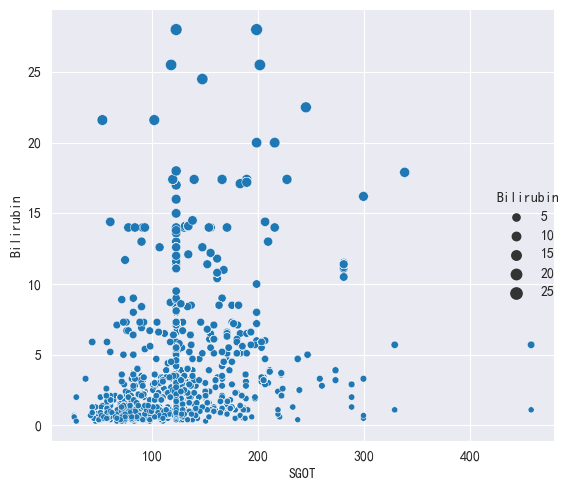

In [22]:
#绘制相关性较大
sns.relplot(data=data, x='SGOT', y='Bilirubin',
            size='Bilirubin',kind='scatter')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
data.sample(20)

Drug  Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
1071           Placebo   55   F       N            N       N     N        1.0   
23572          Placebo   60   F       Y            N       Y     S        1.8   
13140          Placebo   56   F       N            Y       N     N        2.9   
13302  D-penicillamine   55   F       N            N       N     N        0.6   
17026  D-penicillamine   38   F       N            Y       Y     N       16.2   
806            Placebo   61   M       Y            N       Y     S        0.6   
19432          Placebo   48   F       N            Y       N     N        1.2   
14244          Placebo   33   F       N            N       Y     N        6.4   
10868  D-penicillamine   65   F       Y            N       N     S        6.4   
266    D-penicillamine   36   F       N            N       N     N        1.1   
24161  D-penicillamine   56   M       N            Y       N     N        1.2   
14221          Placebo   66   F       N            Y       N     N        0.9   
40             Placebo   48   F       N            Y       N     N        0.9   
22175  D-penicillamine   59   F       N            Y       N     N        1.6   
14482  D-penicillamine   56   F       N            Y       N     N        0.8   
9547   D-penicillamine   62   F       Y            Y       N     S        1.1   
4134           Placebo   51   F       Y            N       N     N        1.1   
10953          Placebo   45   F       N            N       N     N       15.0   
18638          Placebo   66   F       N            N       N     S        0.6   
4405   D-penicillamine   64   F       N            N       N     N        8.9   

       Cholesterol  Albumin      Copper     Alk_Phos        SGOT  \
1071    364.000000     3.48   20.000000   720.000000  134.850000   
23572   369.510563     3.62   97.648387  1982.655769  122.556346   
13140   369.510563     3.45   27.000000  1282.000000  100.750000   
13302   299.000000     4.13   23.000000  2769.000000  220.100000   
17026   369.510563     2.89   42.000000  1828.000000  299.150000   
806     369.510563     3.33   14.000000   733.000000   85.250000   
19432   258.000000     3.57   79.000000  2201.000000  120.900000   
14244   373.000000     3.79  155.000000  1768.000000  120.000000   
10868   344.000000     2.75   16.000000   834.000000   82.000000   
266     303.000000     3.64   20.000000  2108.000000  128.650000   
24161   275.000000     3.43  100.000000  1142.000000   75.000000   
14221   420.000000     3.87   30.000000  1009.000000   57.350000   
40      346.000000     3.37   81.000000  1098.000000  122.450000   
22175   442.000000     2.95  105.000000   820.000000   85.250000   
14482   248.000000     3.98   50.000000   944.000000   93.000000   
9547    432.000000     3.57   45.000000  1406.000000  190.000000   
4134    466.000000     3.91   84.000000  1787.000000  328.600000   
10953   369.510563     3.40   97.648387  1982.655769  122.556346   
18638   369.510563     3.35   97.648387  1982.655769  122.556346   
4405    369.510563     3.76   97.648387  1982.655769  122.556346   

       Tryglicerides  Platelets  Prothrombin  Stage  
1071       88.000000  283.00000          9.9      1  
23572     124.702128  225.00000          9.9      1  
13140     124.702128  227.00000         10.7      1  
13302      85.000000  256.00000         10.7      2  
17026     124.702128  123.00000         12.6      3  
806       124.702128  259.00000         10.9      3  
19432      76.000000  410.00000         11.5      3  
14244     151.000000  200.00000         10.8      1  
10868     179.000000   62.00000         12.9      3  
266        53.000000  380.00000         11.1      1  
24161      91.000000  217.00000         11.3      3  
14221     232.000000  257.02457         11.0      3  
40         90.000000  298.00000         10.0      1  
22175     108.000000  181.00000         10.1      2  
14482      63.000000  128.00000          9.5      2  
9547       77.000000  1

In [24]:
#对离散型变量进行独热编码处理
'''
独热编码造成数据维数太多了
'''
df_hotenco=pd.get_dummies(data[["Sex","Ascites","Hepatomegaly","Spiders","Edema","Drug"]],columns=["Sex","Ascites","Hepatomegaly","Spiders","Edema","Drug"]).astype(int)
df_combined = pd.concat([data.drop(columns=["Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Drug"]), df_hotenco], axis=1)
# df_combined.sample(20)
list(df_combined.columns)

['Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage',
 'Sex_F',
 'Sex_M',
 'Ascites_N',
 'Ascites_Y',
 'Hepatomegaly_N',
 'Hepatomegaly_Y',
 'Spiders_N',
 'Spiders_Y',
 'Edema_N',
 'Edema_S',
 'Edema_Y',
 'Drug_D-penicillamine',
 'Drug_Placebo']

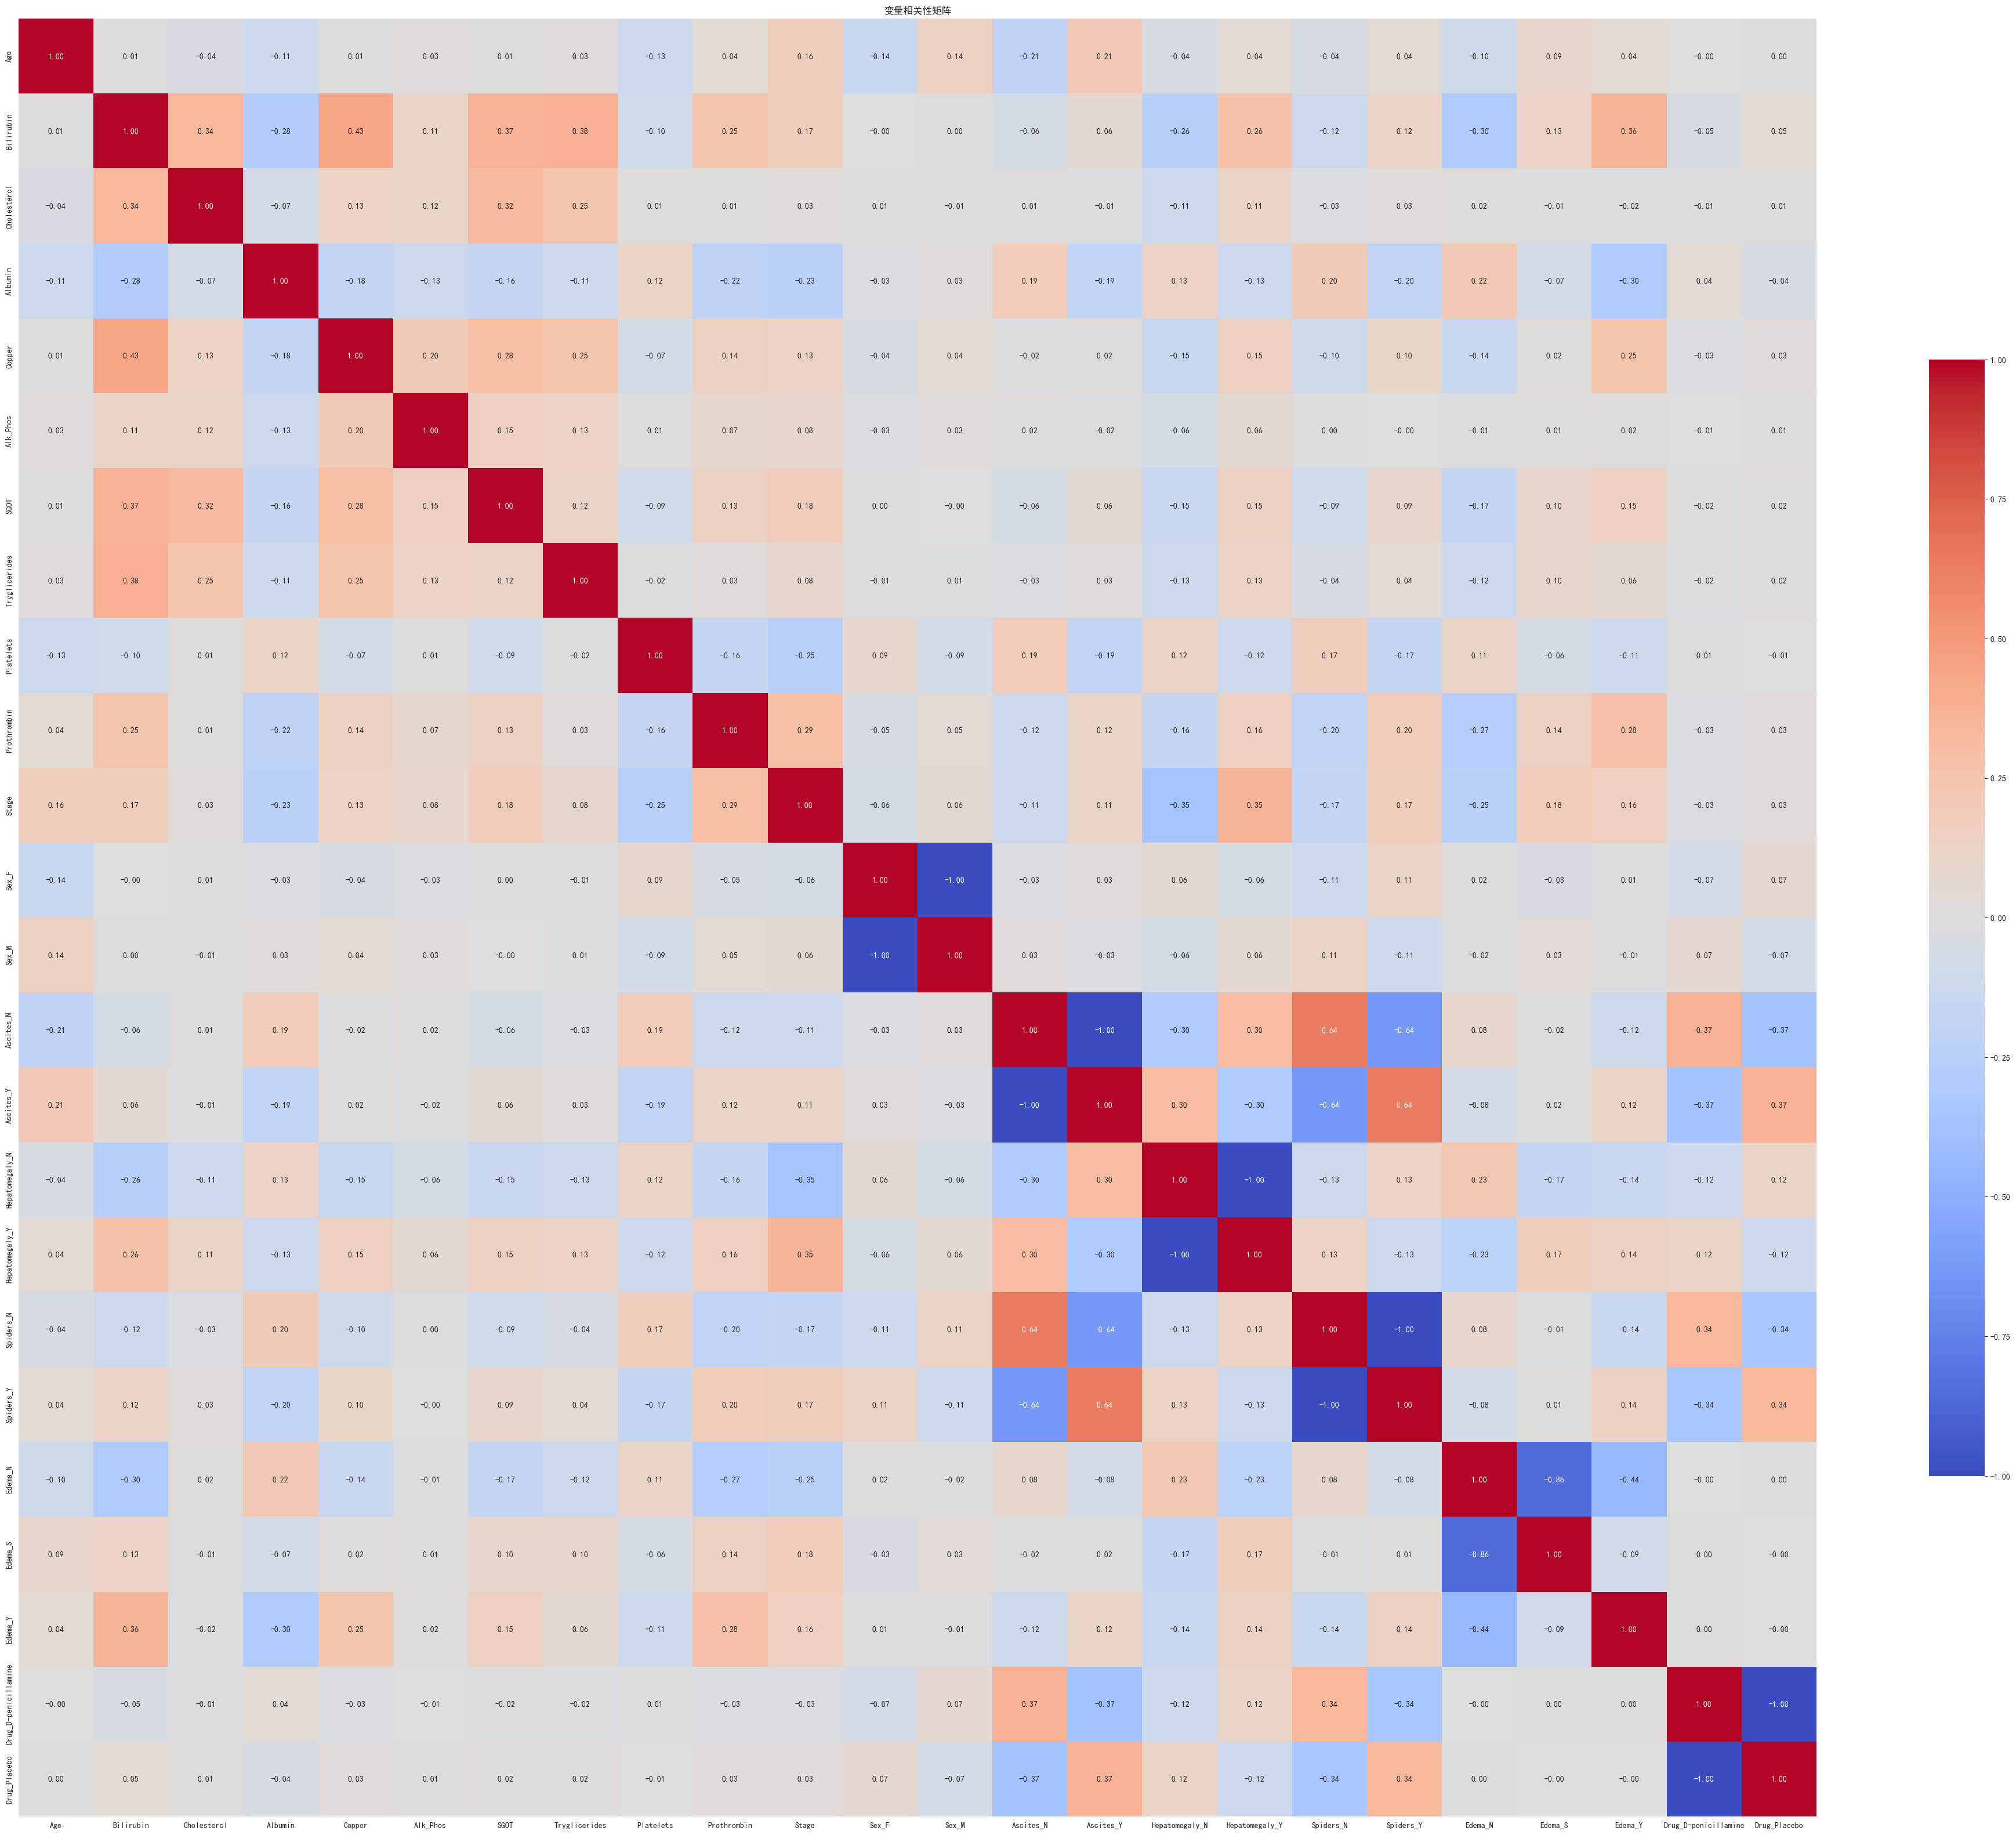

In [25]:

columns_to_plot = ['Bilirubin', 'Cholesterol', 'Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
df_combin = df_combined
# 计算相关系数矩阵
corr_hot = df_combined.corr()

# 绘制热力图
plt.figure(figsize=(50, 50))
sns.heatmap(corr_hot, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('变量相关性矩阵')
plt.show()

In [26]:
'''
对离散型变量的独热编码造成数据维数增加.
因此改用
标签编码方式
'''
#标签编码方式

label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Drug'] = label_encoder.fit_transform(data['Drug'])
data['Edema'] = label_encoder.fit_transform(data['Edema'])
data['Ascites'] = label_encoder.fit_transform(data['Ascites'])
data['Hepatomegaly'] = label_encoder.fit_transform(data['Hepatomegaly'])
data['Spiders'] = label_encoder.fit_transform(data['Spiders'])


data.sample(20)

Drug  Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  \
178       1   60    0        0             1        0      0       11.0   
629       1   62    0        0             0        0      0        1.1   
10661     0   54    0        0             1        1      1       17.1   
562       1   54    1        1             0        1      0        1.4   
21163     0   62    0        1             1        0      1        1.1   
12311     0   63    0        0             1        1      0       11.0   
17621     1   49    0        0             1        1      1       20.0   
8069      1   56    0        1             0        1      0        0.5   
10249     1   44    0        0             0        0      0        1.0   
17076     1   41    0        0             0        0      0        7.1   
20455     1   33    0        0             1        0      0       13.0   
14508     0   52    0        0             0        0      0        0.8   
10265     1   46    0        1             0        1      0        0.5   
19633     1   69    0        0             1        0      0        0.9   
9678      1   48    0        1             1        1      2        0.9   
6368      1   44    0        0             0        0      0        3.6   
13025     1   64    0        1             0        1      0        1.1   
7042      1   45    0        0             1        1      1        1.2   
19916     0   75    0        0             0        0      1        1.2   
9429      0   46    1        0             1        0      0        1.0   

       Cholesterol  Albumin      Copper     Alk_Phos        SGOT  \
178     674.000000     3.55  358.000000  2412.000000  167.400000   
629     336.000000     3.74   48.000000   823.000000   84.000000   
10661   674.000000     2.53  207.000000  2078.000000  182.900000   
562     369.510563     3.82   97.648387  1982.655769  122.556346   
21163   464.000000     3.57   38.000000  1644.000000  151.900000   
12311   674.000000     3.55  358.000000  2412.000000  167.400000   
17621   652.000000     3.46  159.000000  3292.000000  215.450000   
8069    120.000000     3.61   53.000000   804.000000  110.050000   
10249   369.510563     3.64   97.648387  1982.655769  122.556346   
17076   369.510563     3.51   97.648387  1982.655769  122.556346   
20455  1336.000000     4.16   71.000000  3510.000000  209.250000   
14508   315.000000     3.70   13.000000  1637.000000  170.500000   
10265   369.510563     3.76   97.648387  1982.655769  122.556346   
19633   404.000000     3.43   34.000000  1866.000000   79.050000   
9678    420.000000     3.67   30.000000  1009.000000   57.350000   
6368    374.000000     3.50  143.000000  1428.000000  188.000000   
13025   257.000000     3.36   43.000000  1080.000000  106.950000   
7042    275.000000     3.43  100.000000  1142.000000   75.000000   
19916   288.000000     3.37   32.000000   791.000000   57.350000   
9429    448.000000     3.74  102.000000  1128.000000   71.000000   

       Tryglicerides  Platelets  Prothrombin  Stage  
178       140.000000      221.0          9.8      2  
629       108.000000      281.0         10.2      2  
10661     598.000000      183.0         10.3      3  
562       124.702128      249.0         10.3      1  
21163     102.000000      139.0         11.4      3  
12311     140.000000      385.0         11.7      2  
17621     184.000000      132.0         12.1      2  
8069       52.000000      141.0         10.0      2  
10249     124.702128      271.0         10.6      2  
17076     124.702128      474.0         10.9      1  
20455     111.000000      338.0         11.9      2  
14508      70.000000      273.0         10.5      1  
10265     124.702128      419.0         10.1      1  
19633     224.000000      236.0          9.9      2  
9678      232.000000      110.0         11.1      3  
6368       44.000000      271.0         10.6      2  
13025      73.000000      189.0         10.4      3  
7042       91.000000      430.

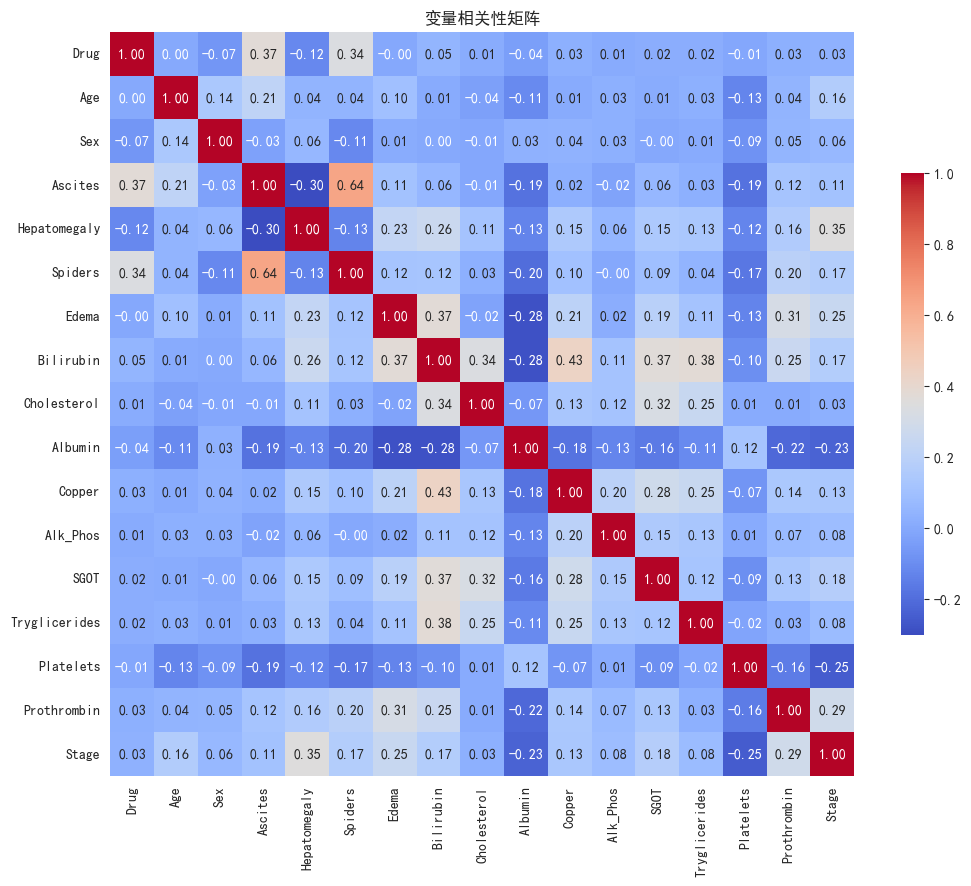

In [27]:
# columns_encde = ['Drug','Sex','Ascites','Hepatomegaly', 'Spiders','Edema','Bilirubin','Cholesterol', 'Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin','Stage']
df_label=data
# 计算相关系数矩阵
corr = df_label.corr()

# 绘制热力图
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('变量相关性矩阵')
plt.show()

In [28]:
# 相关系数矩阵
df_label.corr()

Drug       Age       Sex   Ascites  Hepatomegaly   Spiders  \
Drug           1.000000  0.004352 -0.070240  0.371468     -0.115855  0.335426   
Age            0.004352  1.000000  0.140955  0.213028      0.042975  0.041982   
Sex           -0.070240  0.140955  1.000000 -0.028170      0.059129 -0.112474   
Ascites        0.371468  0.213028 -0.028170  1.000000     -0.300229  0.636974   
Hepatomegaly  -0.115855  0.042975  0.059129 -0.300229      1.000000 -0.130854   
Spiders        0.335426  0.041982 -0.112474  0.636974     -0.130854  1.000000   
Edema         -0.003558  0.096947  0.011369  0.106499      0.228946  0.116664   
Bilirubin      0.046757  0.005160  0.001442  0.059315      0.262475  0.122363   
Cholesterol    0.009986 -0.035487 -0.010327 -0.009212      0.112169  0.029342   
Albumin       -0.039801 -0.109663  0.030589 -0.186447     -0.128430 -0.198760   
Copper         0.027728  0.006007  0.039261  0.023429      0.150825  0.102939   
Alk_Phos       0.005376  0.029448  0.026259 -0.021293      0.055129 -0.002060   
SGOT           0.019675  0.010781 -0.000592  0.058335      0.145789  0.094804   
Tryglicerides  0.019693  0.029460  0.008854  0.029818      0.131930  0.043507   
Platelets     -0.005776 -0.125252 -0.085006 -0.187761     -0.124463 -0.170010   
Prothrombin    0.025733  0.042343  0.046095  0.116296      0.156886  0.195255   
Stage          0.030862  0.164968  0.061687  0.111012      0.353210  0.168049   

                  Edema  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
Drug          -0.003558   0.046757     0.009986 -0.039801  0.027728  0.005376   
Age            0.096947   0.005160    -0.035487 -0.109663  0.006007  0.029448   
Sex            0.011369   0.001442    -0.010327  0.030589  0.039261  0.026259   
Ascites        0.106499   0.059315    -0.009212 -0.186447  0.023429 -0.021293   
Hepatomegaly   0.228946   0.262475     0.112169 -0.128430  0.150825  0.055129   
Spiders        0.116664   0.122363     0.029342 -0.198760  0.102939 -0.002060   
Edema          1.000000   0.374997    -0.022112 -0.283490  0.206763  0.017813   
Bilirubin      0.374997   1.000000     0.339106 -0.283105  0.432199  0.112972   
Cholesterol   -0.022112   0.339106     1.000000 -0.066418  0.129223  0.116131   
Albumin       -0.283490  -0.283105    -0.066418  1.000000 -0.179171 -0.125686   
Copper         0.206763   0.432199     0.129223 -0.179171  1.000000  0.200772   
Alk_Phos       0.017813   0.112972     0.116131 -0.125686  0.200772  1.000000   
SGOT           0.191645   0.368024     0.322450 -0.162569  0.281353  0.151769   
Tryglicerides  0.114228   0.379776     0.248305 -0.111661  0.253358  0.129874   
Platelets     -0.129038  -0.095162     0.008835  0.118662 -0.074730  0.007922   
Prothrombin    0.312881   0.254145     0.006194 -0.215859  0.141349  0.072392   
Stage          0.251095   0.168006     0.025415 -0.231631  0.131763  0.084407   

                   SGOT  Tryglicerides  Platelets  Prothrombin     Stage  
Drug           0.019675       0.019693  -0.005776     0.025733  0.030862  
Age            0.010781       0.029460  -0.125252     0.042343  0.164968  
Sex           -0.000592       0.008854  -0.085006     0.046095  0.061687  
Ascites        0.058335       0.029818  -0.187761     0.116296  0.111012  
Hepatomegaly   0.145789       0.131930  -0.124463     0.156886  0.353210  
Spiders        0.094804       0.043507  -0.170010     0.195255  0.168049  
Edema          0.191645       0.114228  -0.129038     0.312881  0.251095  
Bilirubin      0.368024       0.379776  -0.095162     0.254145  0.168006  
Cholesterol    0.322450       0.248305   0.008835     0.006194  0.025415  
Albumin       -0.162569      -0.111661   0.118662    -0.215859 -0.231631  
Copper         0.281353       0.253358  -0.074730     0.141349  0.131763  
Alk_Phos       0.151769       0.129874   0.007922     0.072392  0.084407  
SGOT           1.000000       0.122173  -0.093752     0.133210  0.175301  
Tryglicerides  0.122173       1.000000  -0.020636  

In [29]:
'''
选择不同的数据列进行训练
'''
#数据集划分
X= data.drop(columns="Stage").drop(columns=['Age','Sex'])
y=data["Stage"]
X.shape, y.shape

((25000, 14), (25000,))

In [30]:
X.sample(20)

Drug  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  Cholesterol  \
8568      1        0             0        0      0        1.8   460.000000   
23309     1        0             0        0      0        0.7   281.000000   
6042      1        0             1        0      0        0.8   369.510563   
9828      1        0             1        0      1        1.1   432.000000   
1967      1        0             1        0      0        0.9   420.000000   
15087     0        0             1        1      0        6.3   436.000000   
5043      0        0             1        1      0        6.7   217.000000   
20196     1        0             1        0      0        2.3   178.000000   
18169     1        1             0        1      0        0.4   263.000000   
4675      1        1             0        1      0        1.1   412.000000   
24952     1        0             0        0      0        0.7   578.000000   
17100     0        0             0        0      0        1.0   309.000000   
24736     0        0             0        1      2        2.4   168.000000   
6302      0        0             1        1      2       17.2   222.000000   
24501     1        0             1        0      0        1.3   304.000000   
9611      0        0             1        1      0        0.6   369.510563   
3227      0        0             0        1      0        3.6   348.000000   
22835     0        0             0        1      0        6.4   373.000000   
11892     1        1             0        1      0        3.1   369.510563   
7343      0        0             0        0      0        3.3   383.000000   

       Albumin      Copper     Alk_Phos        SGOT  Tryglicerides  Platelets  \
8568      3.35  148.000000  1472.000000  108.500000     118.000000  231.00000   
23309     3.85   40.000000  1181.000000   88.350000     130.000000  244.00000   
6042      3.82   58.000000   678.000000   97.650000     124.702128  277.00000   
9828      3.57   45.000000  1406.000000  190.000000      77.000000  176.00000   
1967      3.87   30.000000  1009.000000   57.350000     232.000000  257.02457   
15087     3.02   75.000000  2176.000000  170.500000     104.000000  284.00000   
5043      3.74  103.000000  1391.000000   75.950000     114.000000  266.00000   
20196     3.00  145.000000   746.000000  178.250000     122.000000  119.00000   
18169     3.76   29.000000  1345.000000  137.950000      74.000000  194.00000   
4675      3.99  103.000000  1293.000000   91.000000     113.000000  286.00000   
24952     3.66   35.000000  1353.000000  127.100000     105.000000  198.00000   
17100     3.66   67.000000  1214.000000  158.100000     101.000000  380.00000   
24736     2.56  225.000000  1056.000000  120.900000      75.000000  108.00000   
6302      3.23  209.000000  1975.000000  189.100000     195.000000  104.00000   
24501     3.52   97.000000  1622.000000   71.000000     169.000000  255.00000   
9611      4.38   97.648387  1982.655769  122.556346     124.702128  221.00000   
3227      2.88  121.000000   938.000000  120.000000     146.000000  251.00000   
22835     3.46  155.000000  1768.000000  120.000000     151.000000  258.00000   
11892     3.56   97.648387  1982.655769  122.556346     124.702128  219.00000   
7343      3.53  102.000000  1234.000000  137.950000      87.000000  283.00000   

       Prothrombin  
8568          10.8  
23309         10.6  
6042          11.0  
9828          11.6  
1967           9.2  
15087          9.8  
5043          11.1  
20196         12.0  
18169         10.8  
4675          13.1  
24952         10.8  
17100         11.1  
24736         14.1  
6302          13.0  
24501          9.5  
9611          10.6  
3227          11.0  
22835         10.1  
11892         11.5  
7343           9.8

In [31]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5)
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((17500, 14), (17500,), (7500, 14), (7500,))

In [32]:
'''
自由森林模型
'''
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

In [42]:
'''
逻辑回归模型
'''
model_logistic = LogisticRegression(multi_class="multinomial",solver='lbfgs',max_iter=10000)
model_logistic.fit(X_train,y_train)
predictions = model_logistic.predict(X_test)
accuracy_score(y_test,predictions)

'''
太低了
使用变量相关性较小时使用的
自由森林模型
'''

0.5536

In [34]:
#数据集划分
# 增加训练数据列 Sex
# 去除相关性较大的 Ascites
X2= data.drop(columns="Stage").drop(columns=['Age','Ascites'])
y2=data["Stage"]
# X.shape, y.shape

X_train2, X_test2,y_train2, y_test2 = train_test_split(X2,y2, test_size=0.3, random_state=5)
# X_train.shape, y_train.shape,X_test.shape, y_test.shape

from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train2, y_train2)
y_pred2 = model_rf.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
accuracy

0.9456

In [41]:
#自由森林模型  增加 'Age'列
#数据集划分
X3= data.drop(columns=["Stage"])
y3=data["Stage"]

X_train3, X_test3,y_train3, y_test3 = train_test_split(X3,y3, test_size=0.3, random_state=5)

model_rf = RandomForestClassifier(n_estimators=110, random_state=42)
model_rf.fit(X_train3, y_train3)
y_pred3 = model_rf.predict(X_test3)

accuracy = accuracy_score(y_test3, y_pred3)
accuracy

0.952

In [ ]:
'''
以上模型均没有对数据的离群值做出处理
以下是对数据离群值处理
对数据离群值处理是否会影响模型精度
'''
data.sample(20)

In [36]:
# 使用DBSCAN++识别离群值

def dbscan_plus_plus_outliers(df, eps=0.35, min_samples=3):
    outliers_dict = {}  # 空字典，用于存储每一列的异常值
    for column in df.columns:
        # 提取当前列的数据
        X = df[column].values.reshape(-1, 1)
        # 使用DBSCAN++进行离群值检测
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        # 获取当前列的离群值的索引
        outliers_indices = np.where(dbscan.labels_ == -1)[0]
        # 存储当前列的离群值
        outliers_dict[column] = df[column].iloc[outliers_indices]
    return outliers_dict

outliers_dict = dbscan_plus_plus_outliers(data.drop(columns=['Drug','Age','Sex','Ascites','Hepatomegaly','Spiders','Edema','Stage']), eps=0.3, min_samples=3)


In [37]:
outliers_dict

{'Bilirubin': 3020     10.5
 4808     10.0
 15504    10.4
 Name: Bilirubin, dtype: float64,
 'Cholesterol': 514       301.0
 1662      381.0
 3800      221.0
 3884      384.0
 3953      234.0
 4616      381.0
 5389      384.0
 5814      289.0
 8359      363.0
 9452      234.0
 9687      678.0
 9932      445.0
 11493     192.0
 12228     224.0
 15659     153.0
 16103     661.0
 17652     319.0
 18236    1072.0
 18768     724.0
 18819     148.0
 Name: Cholesterol, dtype: float64,
 'Albumin': Series([], Name: Albumin, dtype: float64),
 'Copper': 500      242.0
 818      174.0
 1304     460.0
 1458       8.0
 2554     170.0
 3707     132.0
 3767     261.0
 4017     171.0
 4078     153.0
 6226       8.0
 6421      83.0
 7378     360.0
 7638     163.0
 8255     453.0
 8558     282.0
 8598     350.0
 8606      61.0
 8629     252.0
 8845     162.0
 9694     187.0
 10109    187.0
 10412    259.0
 10543    351.0
 11595    169.0
 12041    259.0
 12312    132.0
 12376    163.0
 12405    153.0
 124

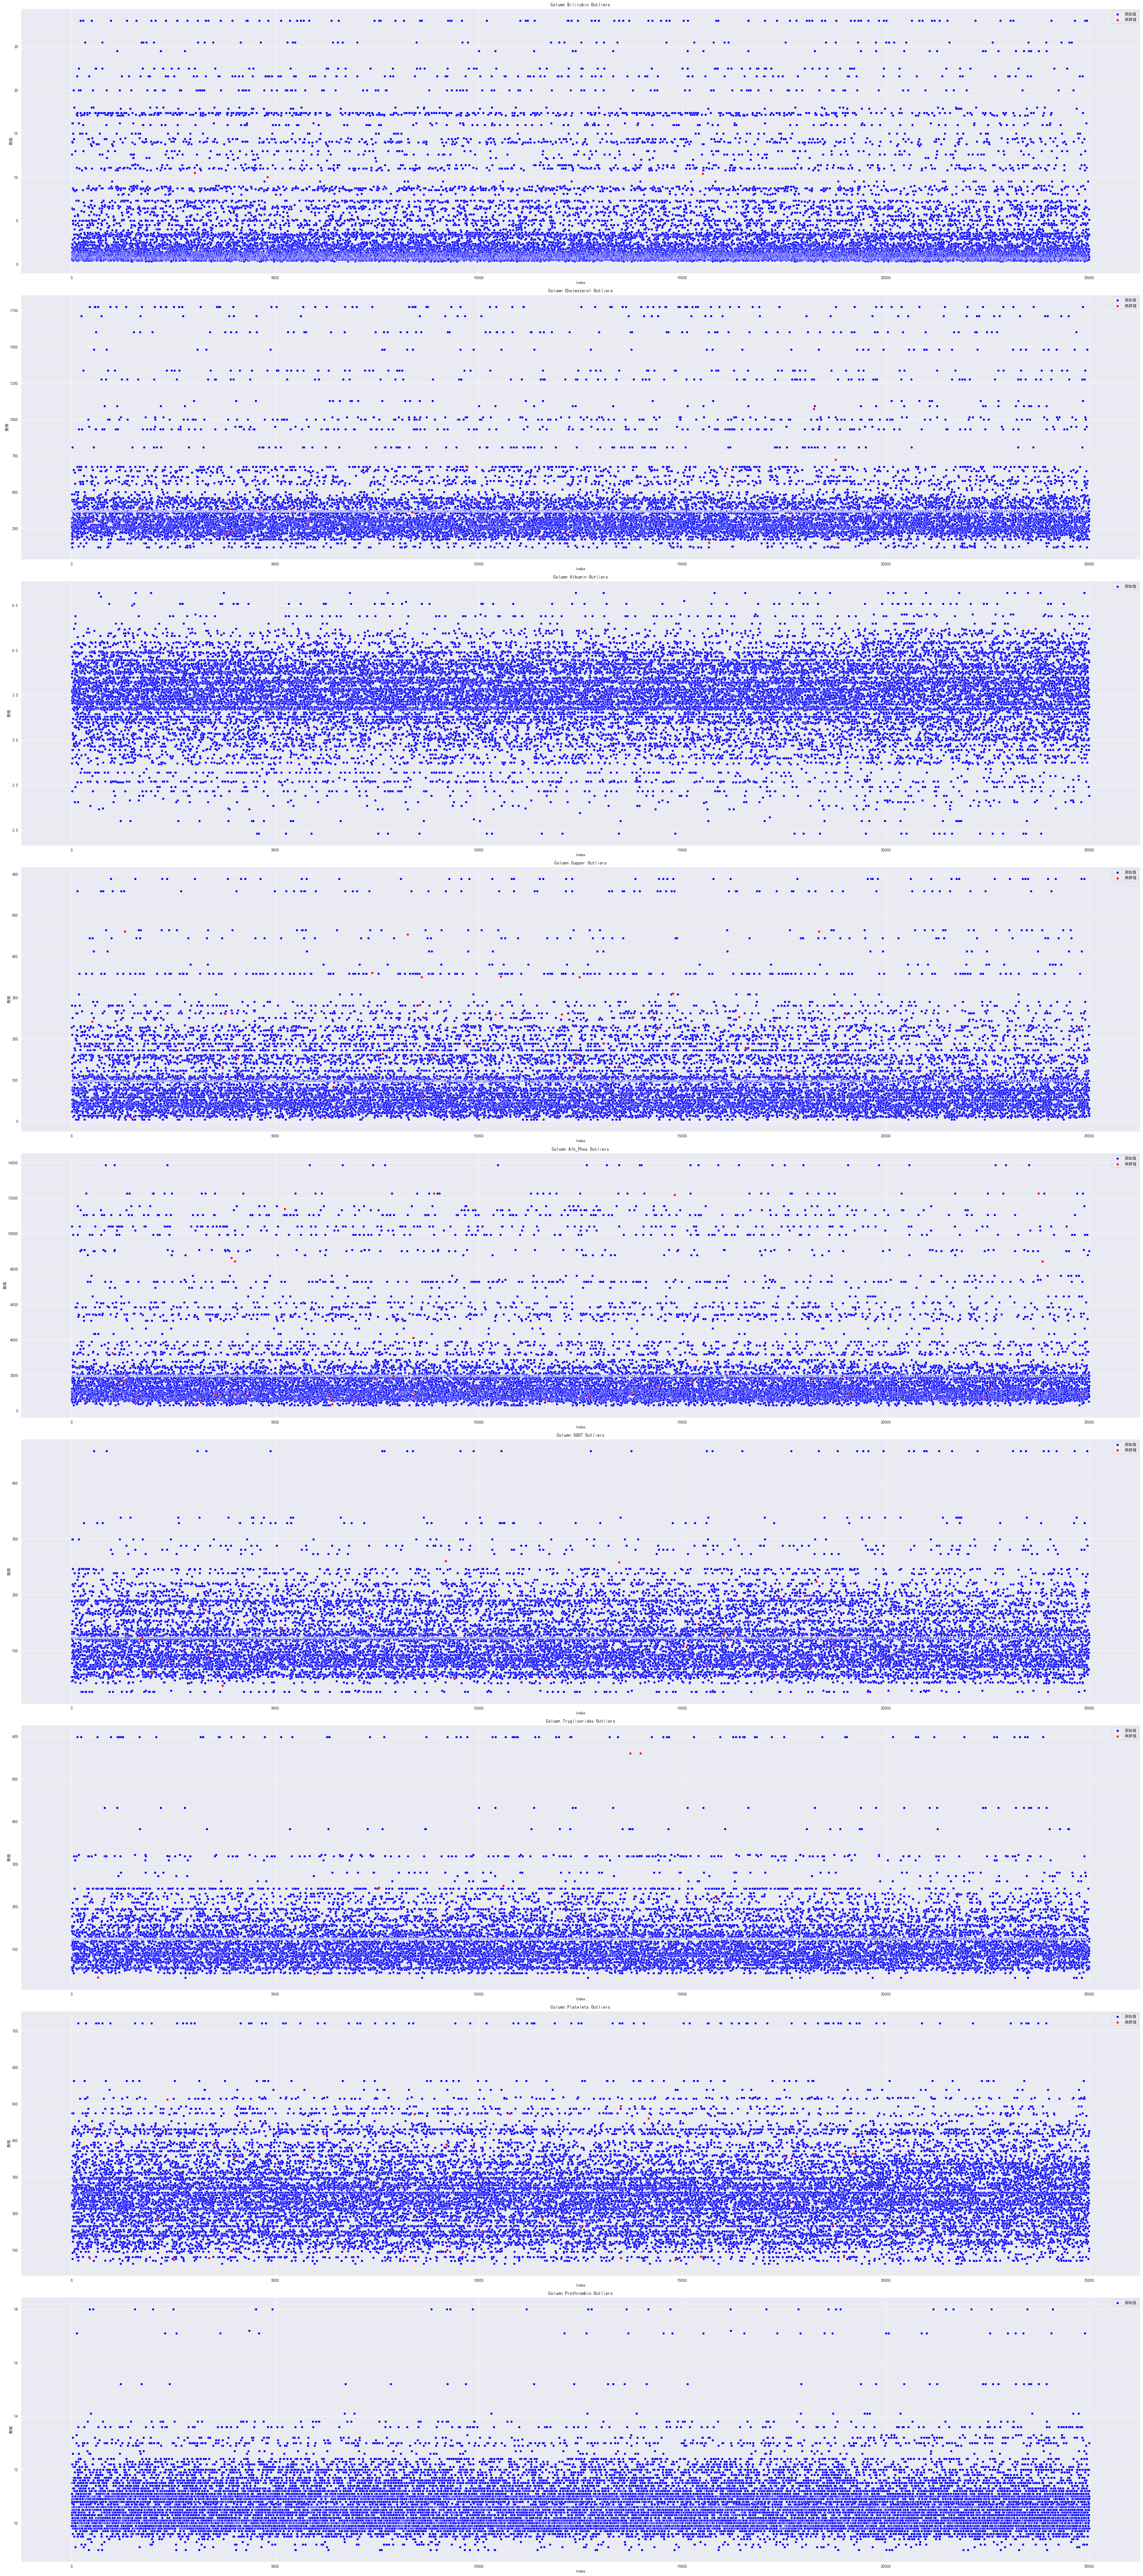

In [38]:
#可视化异常值

'''
分组绘制 图小
'''

use_data =data.drop(columns=['Drug','Age','Sex','Ascites','Hepatomegaly','Spiders','Edema','Stage'])

fig, axes = plt.subplots(nrows=len(use_data.columns), figsize=(40, 90))

for i, column in enumerate(use_data.columns):
    # 原始数据
    sns.scatterplot(x=data.index, y=use_data[column], ax=axes[i], color='b', label='原始值')
    # 异常值
    outliers = outliers_dict[column]
    sns.scatterplot(x=outliers.index, y=outliers.values, ax=axes[i], color='r', label='离群值')
   
    axes[i].set_title(f'Column {column} Outliers')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('数据')
    axes[i].legend()

# 调整子图间距
plt.tight_layout()
# 显示图形
plt.show()


In [39]:
#对异常值填充
def fill_outliers_with_median(df, outliers_dict):
    filled_df = df.copy()
    for column, outliers in outliers_dict.items():
        # 计算中位数
        median = df[column].median()
        # 将异常值替换为中位数
        filled_df.loc[outliers.index, column] = median
    return filled_df


filled_df = fill_outliers_with_median(data, outliers_dict)

# 打印填充后的 DataFrame
filled_df

Drug  Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  \
0         1   50    0        0             1        0      0        0.5   
1         1   54    1        1             0        1      0        0.5   
2         1   32    0        0             0        0      0        0.5   
3         1   45    0        0             0        0      0        0.7   
4         1   59    0        0             1        0      0        1.9   
...     ...  ...  ...      ...           ...      ...    ...        ...   
24995     0   64    0        0             0        0      0        0.8   
24996     0   64    0        0             0        0      0        0.8   
24997     0   45    0        0             1        1      2        5.1   
24998     0   46    0        0             1        0      0        0.8   
24999     0   46    0        0             1        0      0        0.8   

       Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0       149.000000     4.04   227.0     598.0   52.70      57.000000   
1       219.000000     3.93    22.0     663.0   45.00      75.000000   
2       320.000000     3.54    51.0    1243.0  122.45      80.000000   
3       255.000000     3.74    23.0    1024.0   77.50      58.000000   
4       486.000000     3.54    74.0    1052.0  108.50     109.000000   
...            ...      ...     ...       ...     ...            ...   
24995   231.000000     3.87   173.0    9009.8  127.71      96.000000   
24996   231.000000     3.87   173.0    9009.8  127.71      96.000000   
24997   369.510563     3.23    18.0     790.0  179.80     124.702128   
24998   315.000000     4.24    13.0    1637.0  170.50      70.000000   
24999   315.000000     4.24    13.0    1637.0  170.50      70.000000   

       Platelets  Prothrombin  Stage  
0          256.0          9.9      1  
1          220.0         10.8      2  
2          225.0         10.0      2  
3          151.0         10.2      2  
4          151.0         11.5      1  
...          ...          ...    ...  
24995      295.0         11.0      2  
24996      295.0         11.0      2  
24997      104.0         13.0      3  
24998      426.0         10.9      2  
24999      426.0         10.9      2  

[25000 rows x 17 columns]

In [40]:
X4= filled_df.drop(columns=["Stage",'Ascites'])
y4=filled_df["Stage"]
# X.shape, y.shape

X_train4, X_test4,y_train4, y_test4 = train_test_split(X4,y4, test_size=0.3, random_state=5)
# X_train.shape, y_train.shape,X_test.shape, y_test.shape

model_rf = RandomForestClassifier(n_estimators=95, random_state=42)
model_rf.fit(X_train4, y_train4)
y_pred4 = model_rf.predict(X_test4)

accuracy = accuracy_score(y_test4, y_pred4)
accuracy

0.9502666666666667